In [123]:
import pandas as pd

# Time series / date functionality in Pandas
* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* We're going to look at three different concepts in Pandas
    - 1) Timestamps
    - 2) Timedeltas

## 1) Timestamp objects
* Pandas has built-in TimeStamp objects
* An array of TimeStamp objects are a DateTimeIndex
* The datatype of a TimeStamp object is datetime64
* There are two main methods of creating Timestamps or a DateTimeIndex:
    - 1) `pd.to_datetime()`
    - 2) `pd.date_range()`

#### `pd.to_datetime()`

- You can use a lot of different formats to convert a string into a Timestamp

In [124]:
pd.to_datetime('02 March 2020')
#timenow = pd.to_datetime('now', utc=True).tz_convert('CET')
#pd.to_datetime('02 March 2020')

Timestamp('2020-03-02 00:00:00')

In [125]:
pd.to_datetime('03/02/2020')

Timestamp('2020-03-02 00:00:00')

In [126]:
pd.to_datetime('02-03-2020', dayfirst=True)

Timestamp('2020-03-02 00:00:00')

In [127]:
pd.to_datetime('02.03.2020', dayfirst=True)

Timestamp('2020-03-02 00:00:00')

- You could also pass a pd.Series or a pd.DataFrame into `pd.to_datetime()` if the values are convertable to a Timestamp.

In [128]:
dates = ['02 March 2020', '03/04/2020']

In [131]:
dates2 =pd.to_datetime(dates)
dates2

DatetimeIndex(['2020-03-02', '2020-03-04'], dtype='datetime64[ns]', freq=None)

#### `pd.date_range()`

What happens if you want to create a range of dates?
You can use `pd.date_range()` to create a DateTimeIndex (array of Timestamps):

In [132]:
import datetime

In [133]:
end = datetime.datetime.now()
end

datetime.datetime(2020, 3, 2, 12, 27, 38, 813067)

In [141]:
dt_range = pd.date_range('14 February 2020', end=end, freq='min')
dt_range

DatetimeIndex(['2020-02-14 00:00:00', '2020-02-14 00:01:00',
               '2020-02-14 00:02:00', '2020-02-14 00:03:00',
               '2020-02-14 00:04:00', '2020-02-14 00:05:00',
               '2020-02-14 00:06:00', '2020-02-14 00:07:00',
               '2020-02-14 00:08:00', '2020-02-14 00:09:00',
               ...
               '2020-03-02 12:18:00', '2020-03-02 12:19:00',
               '2020-03-02 12:20:00', '2020-03-02 12:21:00',
               '2020-03-02 12:22:00', '2020-03-02 12:23:00',
               '2020-03-02 12:24:00', '2020-03-02 12:25:00',
               '2020-03-02 12:26:00', '2020-03-02 12:27:00'],
              dtype='datetime64[ns]', length=25228, freq='T')

In [142]:
dt_range[2].second

0

In [143]:
pd.Series(dt_range)

0       2020-02-14 00:00:00
1       2020-02-14 00:01:00
2       2020-02-14 00:02:00
3       2020-02-14 00:03:00
4       2020-02-14 00:04:00
                ...        
25223   2020-03-02 12:23:00
25224   2020-03-02 12:24:00
25225   2020-03-02 12:25:00
25226   2020-03-02 12:26:00
25227   2020-03-02 12:27:00
Length: 25228, dtype: datetime64[ns]

### This is all nice and fine, but why do we care?

The reason we care for Timestamps in pandas is because they allow us to perform time related actions on the data.
Several things you can do with a timestamp:

- extract the hour
- extract the day
- extract the month
- extract the year
- Slice a DataFrame or Series if the DateTimeIndex is the Index of the DataFrame
- calculate time differences

How could that be useful?
Let us look at the data for this week and think about what we could do with this functionality:

- Extract weekdays from the Timestamp
- Extract the hour of the day from the Timestamp
- Create subsets of the data
- ...

In [144]:
df = pd.read_csv('train.csv', parse_dates=True, index_col=0)
#df = df.reset_index()
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [146]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [149]:
df.datetime = pd.to_datetime(df.index)
df.datetime

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [150]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [151]:
type(df.datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [152]:
df.datetime[0]

Timestamp('2011-01-01 00:00:00')

In [153]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [160]:
df.loc['2011-01-01 00']

season         1.000
holiday        0.000
workingday     0.000
weather        1.000
temp           9.840
atemp         14.395
humidity      81.000
windspeed      0.000
casual         3.000
registered    13.000
count         16.000
Name: 2011-01-01 00:00:00, dtype: float64

In [157]:
df.loc['2011-01-01 00']

season         1.000
holiday        0.000
workingday     0.000
weather        1.000
temp           9.840
atemp         14.395
humidity      81.000
windspeed      0.000
casual         3.000
registered    13.000
count         16.000
Name: 2011-01-01 00:00:00, dtype: float64

In [161]:
df.loc['2011-01-01 00']

season         1.000
holiday        0.000
workingday     0.000
weather        1.000
temp           9.840
atemp         14.395
humidity      81.000
windspeed      0.000
casual         3.000
registered    13.000
count         16.000
Name: 2011-01-01 00:00:00, dtype: float64

In [166]:
df.datetime.resolution = 'D'

AttributeError: Can't set attribute

#### `df.between_time()`

In [167]:
df.between_time('00:00:00', '03:00:00')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-18 03:00:00,4,0,1,1,17.22,21.210,88,12.9980,0,5,5
2012-12-19 00:00:00,4,0,1,1,12.30,15.910,61,0.0000,6,35,41
2012-12-19 01:00:00,4,0,1,1,12.30,15.910,65,6.0032,1,14,15


In [170]:
df['minute'] = df.index.minute
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,minute
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0


## 2) Timedelta objects

Pandas has built-in Timedelta objects
* An array of Timedelta objects is a TimedeltaIndex
* The datatype of a TimeStamp object is timedelta64
* There are three methods of creating Timedeltas or a TimedeltaIndex:
    - 1) `pd.to_timedelta()`
    - 2) `pd.timedelta_range()`
    - 3) Subtract two pd.Timestamp objects

In [171]:
time_difference = df.index.max() - df.index.min()

In [180]:
time_difference.days

718

In [182]:
pd.to_timedelta(['10:10:10', '11:11:11'], unit='D')

TimedeltaIndex(['10:10:10', '11:11:11'], dtype='timedelta64[ns]', freq=None)

In [183]:
pd.timedelta_range()

ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified

## Other concepts: `resample()`, `shift()` and `rolling()`

In [184]:
df.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,minute
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,0


In [186]:
downsampled = df.resample('D').sum()
downsampled

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,minute
datetime,,,,,,,,,,,,
2011-01-01,24,0,0,38,338.66,436.350,1934,257.9969,331,654,985,0
2011-01-02,23,0,0,45,342.76,406.800,1601,382.9988,131,670,801,0
2011-01-03,22,0,22,22,177.12,208.345,962,366.0076,120,1229,1349,0
2011-01-04,23,0,23,24,188.60,243.940,1358,247.0156,108,1454,1562,0
2011-01-05,23,0,23,23,214.02,263.660,1005,288.0129,82,1518,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,96,0,0,33,318.98,406.060,1561,171.0108,767,4280,5047,0
2012-12-16,96,0,0,49,356.70,443.925,2013,161.9926,538,3248,3786,0
2012-12-17,96,0,24,51,387.04,481.800,2177,157.9994,212,4373,4585,0


In [194]:
upsample = downsampled.resample('H').interpolate()
#upsample = downsampled.resample('H').interpolate()

In [195]:
upsample.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,minute
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,24.000000,0.0,0.0,38.000000,338.660000,436.35000,1934.000,257.996900,331.000000,654.000000,985.000000,0.0
2011-01-01 01:00:00,23.958333,0.0,0.0,38.291667,338.830833,435.11875,1920.125,263.205313,322.666667,654.666667,977.333333,0.0
2011-01-01 02:00:00,23.916667,0.0,0.0,38.583333,339.001667,433.88750,1906.250,268.413725,314.333333,655.333333,969.666667,0.0
2011-01-01 03:00:00,23.875000,0.0,0.0,38.875000,339.172500,432.65625,1892.375,273.622138,306.000000,656.000000,962.000000,0.0
2011-01-01 04:00:00,23.833333,0.0,0.0,39.166667,339.343333,431.42500,1878.500,278.830550,297.666667,656.666667,954.333333,0.0
2011-01-01 05:00:00,23.791667,0.0,0.0,39.458333,339.514167,430.19375,1864.625,284.038963,289.333333,657.333333,946.666667,0.0
2011-01-01 06:00:00,23.750000,0.0,0.0,39.750000,339.685000,428.96250,1850.750,289.247375,281.000000,658.000000,939.000000,0.0
2011-01-01 07:00:00,23.708333,0.0,0.0,40.041667,339.855833,427.73125,1836.875,294.455788,272.666667,658.666667,931.333333,0.0
2011-01-01 08:00:00,23.666667,0.0,0.0,40.333333,340.026667,426.50000,1823.000,299.664200,264.333333,659.333333,923.666667,0.0


In [196]:
df.head(27)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,minute
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,0


In [201]:
df['tomorrow'] = df['count'].shift(100)

In [202]:
df.head(100)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,minute,tomorrow
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,NaN
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,NaN
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,NaN
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,NaN
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2,0,NaN
2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3,0,NaN
2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33,0,NaN


In [203]:
df['2011-01-01'][['count', 'yesterday']].plot()

KeyError: "['yesterday'] not in index"

In [204]:
df['rolling'] = df['count'].rolling(24, center=True).mean()

In [205]:
df.head(50)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,minute,tomorrow,rolling
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,NaN,NaN
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,NaN,NaN
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,NaN,NaN
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,NaN,NaN
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,NaN,NaN
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,0,NaN,NaN
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,0,NaN,NaN
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,0,NaN,NaN
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,0,NaN,NaN


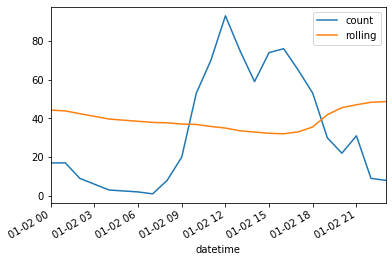

In [207]:
dfx=df['2011-01-02'][['count', 'rolling']].plot()
dfx